In [1]:
#1 Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline



In [2]:
#2. Reading the Data into the variable df.
# Please make sure that the data source file is in the same directory as that of this file.
df = pd.read_csv('insurance.csv')

In [3]:
#3. Peform EDA
#3a Shape of the Data
df.shape


(1338, 7)

In [4]:
#3b Datta Type of each Attribute
df.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
#3c Checking the Presence of missing values
df.isnull().any()



age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [6]:
#3d 5 Point summary of numerical attributes
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


I have taken here a separate Dataframe to capture and separate Numerical Data from Categorical Data. We can work directly on the frame itself. For that, remove the # infront of the statement, and plot all the distribution within the same graph.

      age     bmi      charges
0      19  27.900  16884.92400
1      18  33.770   1725.55230
2      28  33.000   4449.46200
3      33  22.705  21984.47061
4      32  28.880   3866.85520
...   ...     ...          ...
1333   50  30.970  10600.54830
1334   18  31.920   2205.98080
1335   18  36.850   1629.83350
1336   21  25.800   2007.94500
1337   61  29.070  29141.36030

[1338 rows x 3 columns]


C:\Users\shesh\anaconda3\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

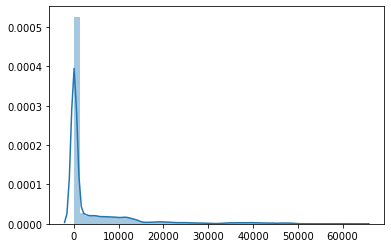

In [7]:
#3e Distribution of 'bmi','age','charges'
numerical_df=df.select_dtypes(include = ['int64','float64'])

#dropping Children from the data as required by the question. Comment this to include children
numerical_df.drop(["children"],axis=1,inplace=True)
print(numerical_df)
# Directly go for printing everything on the same graph NOT RECOMMENDED
cols=["bmi","age","charges"]
sns.distplot(df[cols])

In the above put inplace=False for the data to be stored within the same frame. Ignore the error as that is just a warning.

So, we plot each individual column separately



<AxesSubplot:xlabel='age'>

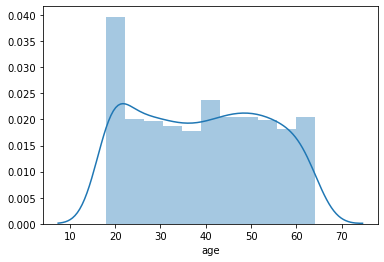

In [8]:
sns.distplot(numerical_df["age"]) #Distribution plot for Age
#sns.distplot(df["age"])


<AxesSubplot:xlabel='bmi'>

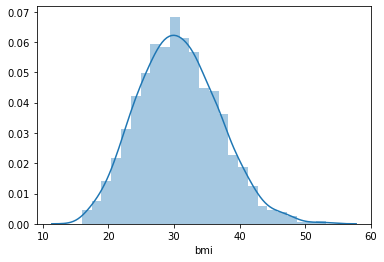

In [9]:
sns.distplot(numerical_df["bmi"]) #Distribution plot for bmi
#sns.distplot(df["bmi"])


<AxesSubplot:xlabel='charges'>

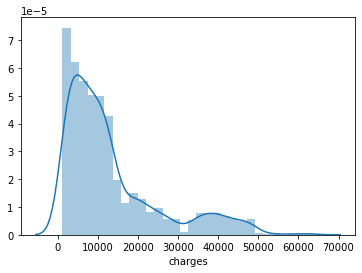

In [10]:
sns.distplot(numerical_df["charges"]) #Distribution plot for charges
#sns.distplot(df["charges"])

In [11]:
#3f Measure of Skewness of the data
numerical_df.skew()

age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

In [12]:
#3g Checking and giving out the list of outliers
for col in numerical_df:
    Quartile1 = np.percentile(numerical_df[col],25)
    Quartile3 = np.percentile(numerical_df[col],75)
    outliers = pd.concat([numerical_df[numerical_df[col] < Quartile1], numerical_df[numerical_df[col]>Quartile3]])
    outlie_count=outliers[col].count()
    if outlie_count==0:
        print ("There are no outliers in ",col,"Column")
    else:
        print ("\n\nThe number of outliers in", col, "is \n \n",outlie_count)
        # print ("\nThe outliers are given as\n\n",outliers[col])  #Remove the Hash infront of this line to vaoid extracting the actual outlying values.      



The number of outliers in age is 
 
 661


The number of outliers in bmi is 
 
 670


The number of outliers in charges is 
 
 670


In [13]:
#Creating a new categorical dataframe, which also includes "children" that can easily dropped from the frame if required.
categorical_df=df.select_dtypes(include=["object"])
categorical_df=pd.concat([categorical_df, df['children'].astype('object')],axis=1) #Comment this line to remove "children" from categorical data.

<AxesSubplot:xlabel='children', ylabel='count'>

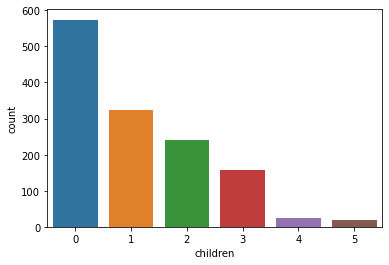

In [14]:
#3h. Distribution of Categorical columns including children
sns.countplot(categorical_df["children"])
#check out how the the number of children is varying in the sample.

<AxesSubplot:xlabel='sex', ylabel='count'>

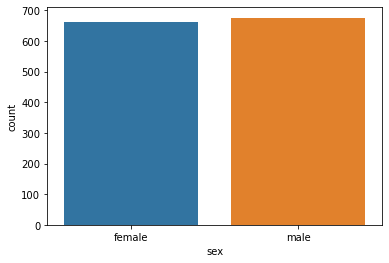

In [15]:
sns.countplot(categorical_df["sex"])
#sns.catplot(x="sex",y='children',data=categorical_df,kind='swarm')

#Uncomment the above to see how many children are there for a given family of smokers or non-smokers

<AxesSubplot:xlabel='smoker', ylabel='count'>

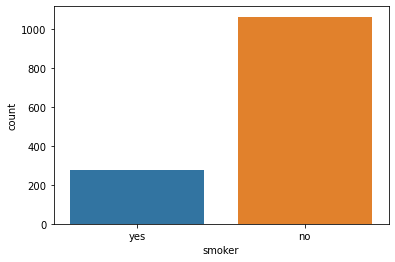

In [16]:
sns.countplot(x="smoker",data=categorical_df)
#sns.catplot(x="children",y='smoker',data=categorical_df,kind='swarm')
#uncomment the above to check how many children are there in smoking household and how many aren't.

<AxesSubplot:xlabel='region', ylabel='count'>

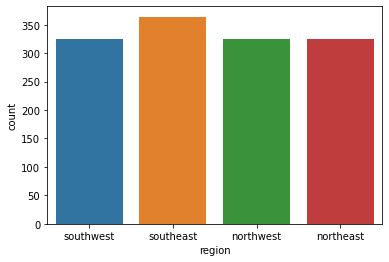

In [17]:
sns.countplot(x="region",data=categorical_df)
#sns.boxplot(x="children",y="region",data=categorical_df)
#sns.catplot(x='children', y="region",data=categorical_df,kind='swarm')
#Un-comment the above for the plot of children in family with region

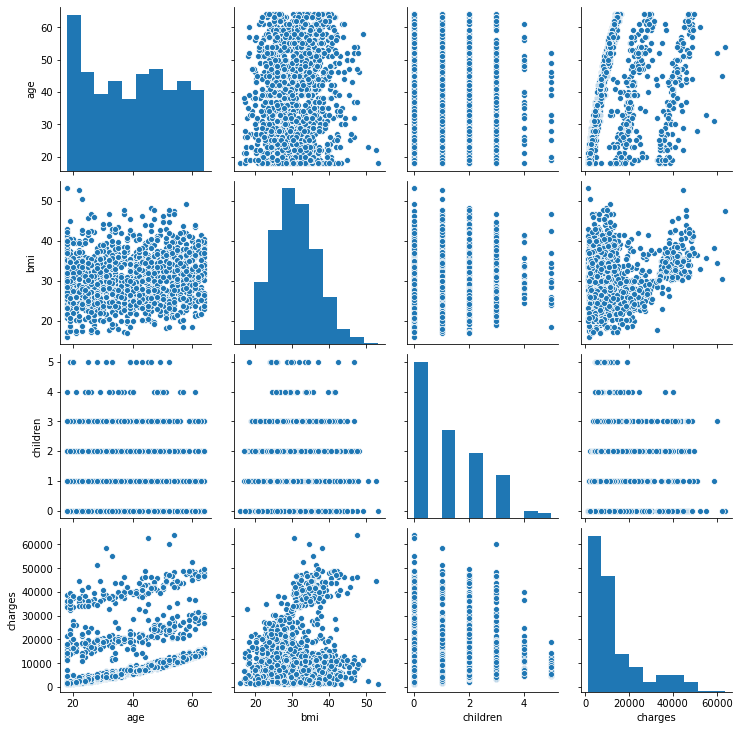

In [18]:
#3i Pair plot all variables
sns.pairplot(df)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

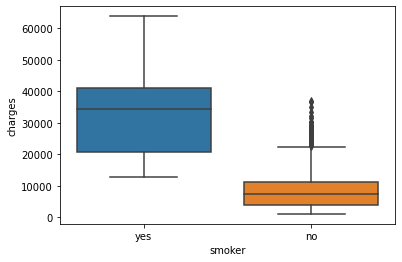

In [19]:
#4 Answer the following with statistical Evidence
#4a. Charges for people who smoke vs those who don't. Does it differ?
sns.boxplot(x="smoker",y="charges",data=df)

#Answer :  Data plot below suggests that the mean charges for Smokers is much higher than the charges for non-smokers.

In [20]:
print ("Mean Charges for Smokers is \n")
print(df[df["smoker"]=='yes'].mean()['charges'],)
print ("\nMean Charges for Non-Smokers is \n")
print(df[df["smoker"]=='no'].mean()['charges'])
print ("\nAverage Charges paid by the Smoker does differ a lot from those who don't.\n")

Mean Charges for Smokers is 

32050.23183153285

Mean Charges for Non-Smokers is 

8434.268297856199

Average Charges paid by the Smoker does differ a lot from those who don't.



<AxesSubplot:xlabel='sex', ylabel='bmi'>

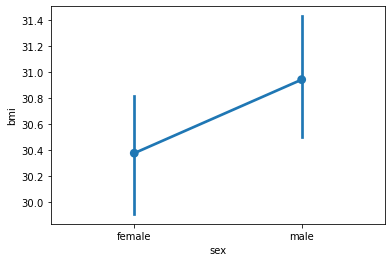

In [21]:
#4b. Does BMI of males different significantly from that of females?
sns.pointplot(x='sex',y="bmi",data=df)
#Answer : Yes, it does differ as the point plot shows, but the mean bmi for male is only slightly higher than that of females, with almost same amount of standard deviation from the mean.

In [22]:
males_bmi=df[df['sex']=="male"]

print("The mean BMI of Males is\n ")
print (males_bmi.mean()["bmi"])

females_bmi=df[df['sex']=="female"]
print ("\nThe mean BMI of Females is\n ")
print (females_bmi.mean()["bmi"])
print ("\nDifference is very little")

The mean BMI of Males is
 
30.943128698224832

The mean BMI of Females is
 
30.377749244713023

Difference is very little


<AxesSubplot:xlabel='sex', ylabel='count'>

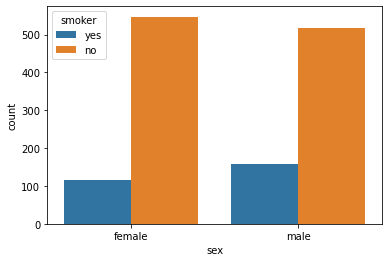

In [23]:
#4c. Is the proportion of smokers significantly different in different genders
sns.countplot(x='sex',hue='smoker',data=df)
#Answer : The difference is not significantly different, but it is not same. Male smokers are a little higher in number while female non-smokers are higher in number. But males do tend to have a higher proportion of smokers than females.

In [24]:
female_df=df[df["sex"]=="female"]
male_df=df[df["sex"]=="male"]
total_females=female_df.count()["smoker"]
total_males=male_df.count()["smoker"]
count_of_females_smoker = female_df[female_df['smoker']=='yes'].count()['smoker']
count_of_males_smoker = male_df[male_df['smoker']=='yes'].count()['smoker']
print ("Total Females\n",total_females)
print ("Total Males\n",total_males)
print ("No of Females who smoke is : ",count_of_females_smoker)
print ("No of Males who Smoke is : ",count_of_males_smoker)

print ("\n Proportion of smokers in females is \n ",count_of_females_smoker/total_females)
print ("\n Proportion of smokers in males is \n ",count_of_males_smoker/total_males)

print ("\nThough higher proportion of males smoke than females, the difference isn't too large\n")

Total Females
 662
Total Males
 676
No of Females who smoke is :  115
No of Males who Smoke is :  159

 Proportion of smokers in females is 
  0.17371601208459214

 Proportion of smokers in males is 
  0.23520710059171598

Though higher proportion of males smoke than females, the difference isn't too large



<AxesSubplot:xlabel='children', ylabel='bmi'>

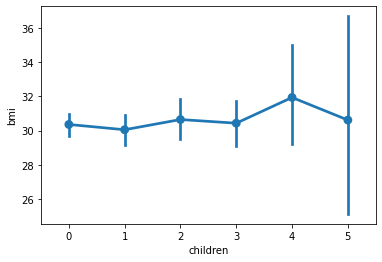

In [25]:
#4d Distribution of bmi across women with no children, one child, two children, the same ?
sns.pointplot(df[df['sex']=="female"]['children'],df['bmi'])
#Answer : As we can see here the average of the bmi doesn't vary much with the number of children women had, so we can say that it stays the same more ore less. But varaitions are huge with respect to number of women who have large variations in BMI, who also have 5 children.

The data is hugely varying with the number of women with children very high in bmi variance while with no children have very less bmi variance.

In [26]:
print ("Covariance between the no of children and bmi for women is given below \n")
print(df[df['sex']=="female"]['children'].cov(df[df['sex']=="female"]['bmi']))

Covariance between the no of children and bmi for women is given below 

0.15965247656439255


In [27]:
print ("Correlation Coefficient here is \n")
print(df[df['sex']=="female"]['children'].corr(df[df['sex']=="female"]['bmi']))
print ("\nwhich indicates there is no relation between No of children and the bmi for women" )

Correlation Coefficient here is 

0.022150703606425824

which indicates there is no relation between No of children and the bmi for women
